## Project Group 34
- Helin Wang 73965865
- Qingfeng Shen  52757085
- Matthew Gillies 59188508
- Hanyu Dai 47608518

In [1]:
library(broom)
library(latex2exp)
library(tidyverse)
library(repr)
library(digest)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(GGally)
library(AER)
install.packages("caret")
library(caret)

Warning message:
“package ‘broom’ was built under R version 4.1.2”
Warning message:
“package ‘latex2exp’ was built under R version 4.1.2”
Warning message:
“package ‘tidyverse’ was built under R version 4.1.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.1 
Warning message:
“package ‘ggplot2’ was built under R version 4.1.2”
Warning message:
“package ‘tibble’ was built under R version 4.1.2”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘repr’ was built under R version 4.1


The downloaded binary packages are in
	/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T//RtmpOANv0W/downloaded_packages


Warning message:
“package ‘caret’ was built under R version 4.1.2”
Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:faraway’:

    melanoma



Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:purrr’:

    lift




# Predicting Used Vehicle Listing Price 

# Introduction:

**Background**

The demand for pre-owned cars has been growing over the years, overtaking the new cars market in some regions of the world including the United States [1]. Many consumers choose used cars due to affordability and economic conditions. Therefore the sales price of a used car is an important aspect in a transaction.

However, used car transactions involve complex decision making from both the sellers and buyers. The sales price of a used car can be more difficult to predict than a new car. The price is influenced not only by the car’s basic features, such as brand, horse power, etc., but also by the condition of the car such as mileage, age, and paintwork [2]. According to data, variation in used car prices is approximately five times as large as the variation of new-car prices [1].

**Objective**

Being able to predict the price of a car based on its attributes can provide insights to both buyers and sellers, helping them make more informed decisions. The objective of this study is to predict used car prices and analyze which variables are significant factors in predicting the price of a used car.

The goal of this project is to build and select a predictive model for the price of a used car with the available input variables using Linear Regression.

**Dataset**

For this project, we are using the dataset originally published on Kaggle in 2016 [2]. 

This dataset contains information about roughly 370,000 used car listings from the e-commerce website Ebay. The twenty columns in the given dataset are as follows:
datecrawled, name, seller, offertype, price, abtest, vehicletype, yearofregistration, gearbox, powerps, model, kilometer, monthofregistration, fueltype, brand, notrepaireddamage, datecreated, nrofpictures, postalcode, lastseen

# Method:

The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Finish this section by reflecting on how your final report might play out:

- What methods do you plan on using?

We will first use forward selection to find the best LR model to predict used car prices. We clean the data and choose the variables that will be useful in this study, and then split the data into a training set (70%) and a testing set (30%). After that, we use regsubset() to select a smaller model with only a subset of the input. By looking at the result, we find that the model with 10 input variables gives the lowest Cp, which means it is the most accurate one. 
After we learn cross-validation, we will find the best model by using cross-validation. Then we will compare its RMSE to that of the model given by forward selection. The model with the smallest RMSE will have the best out-of-sample prediction performance. 
 
- What do you expect to achieve?	

We aim to find the most accurate model to predict the prices of used cars.

- What impact could your results have?

Our predictive model will contribute to the used-car market. It can predict a reasonable price of a used car based on its quality and age which brings convenience to the seller. Moreover, the model can help buyers to choose their favored cars and prepare their budgets. It will make the purchasing process become more convenient and efficient. Therefore, more customers will be attracted and the used-car market will be expanded. This contributes to environmental protection and reduces waste. 

## Preliminary Results


In [2]:
## Loading in dataset:
car_data <- read_csv("./autos.csv") %>% filter(price < 100000 & price > 1000)
head(car_data)


Rows: 367904 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (11): name, seller, offerType, abtest, vehicleType, gearbox, model, fue...
dbl   (6): price, yearOfRegistration, powerPS, kilometer, monthOfRegistratio...
dttm  (3): dateCrawled, dateCreated, lastSeen

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 2 is invalid in this locale

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", 

dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<dttm>
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NA,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NA,2016-03-14,0,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF_4_1_4__3TRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39
2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NA,2016-04-04,0,94505,2016-04-04 23:42:13


## Data Cleaning and Preparation

In [3]:
## Removing NA's from dataset
car_data_clean <- car_data %>% na.omit()
sum(is.na(car_data_clean))
str(car_data_clean)

[1] 0

tibble [214,800 × 20] (S3: tbl_df/tbl/data.frame)
 $ dateCrawled        : POSIXct[1:214800], format: "2016-03-17 16:54:04" "2016-03-31 17:25:20" ...
 $ name               : chr [1:214800] "GOLF_4_1_4__3T\xdcRER" "Skoda_Fabia_1.4_TDI_PD_Classic" "Peugeot_206_CC_110_Platinum" "Mazda_3_1.6_Sport" ...
 $ seller             : chr [1:214800] "privat" "privat" "privat" "privat" ...
 $ offerType          : chr [1:214800] "Angebot" "Angebot" "Angebot" "Angebot" ...
 $ price              : num [1:214800] 1500 3600 2200 2000 2799 ...
 $ abtest             : chr [1:214800] "test" "test" "test" "control" ...
 $ vehicleType        : chr [1:214800] "kleinwagen" "kleinwagen" "cabrio" "limousine" ...
 $ yearOfRegistration : num [1:214800] 2001 2008 2004 2004 2005 ...
 $ gearbox            : chr [1:214800] "manuell" "manuell" "manuell" "manuell" ...
 $ powerPS            : num [1:214800] 75 69 109 105 140 190 75 136 102 160 ...
 $ model              : chr [1:214800] "golf" "fabia" "2_reihe" "3_reihe" ..

In [4]:
## Creating new column to represent age of the vehicle, since all ads are from 2016
car_data_clean$Year <- as.numeric(format(car_data_clean$dateCreated, "%Y"))
car_data_clean1 <- car_data_clean %>% mutate(Age = Year - yearOfRegistration) %>% select(-Year, -yearOfRegistration)
head(car_data_clean1)

Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 2 is invalid in this locale

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mi

dateCrawled,name,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Age
<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<dttm>,<dbl>
2016-03-17 16:54:04,GOLF_4_1_4__3TRER,privat,Angebot,1500,test,kleinwagen,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17,15
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21,8
2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01,0,67112,2016-04-05 18:18:39,12
2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26,0,96224,2016-04-06 10:45:34,12
2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07,0,57290,2016-04-07 10:25:17,11
2016-03-21 12:57:01,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Bluetooth.Doppelkabine,privat,Angebot,17999,control,suv,manuell,190,navara,70000,3,diesel,nissan,nein,2016-03-21,0,04177,2016-04-06 07:45:42,5


In [5]:
car_data_clean1 %>% count(nrOfPictures)
car_data_clean1 %>% count(abtest)

nrOfPictures,n
<dbl>,<int>
0,214800


abtest,n
<chr>,<int>
control,103242
test,111558


In [6]:
## Selecting desired columns:
## We will remove dateCrawled, name, postalCode, dateCreated and lastSeen as these columns are very specific and 
## will not be valuable to our prediction model. We will also remove nrOfPictures as the entire column is zeroes, 
## and abtest as this column is irrelevant in predicting the price. 

car_data_desired <- car_data_clean1 %>% select(-dateCrawled, -name, -postalCode, -dateCreated, -lastSeen, 
                                                 -nrOfPictures, -abtest)
head(car_data_desired)

seller,offerType,price,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
privat,Angebot,1500,kleinwagen,manuell,75,golf,150000,6,benzin,volkswagen,nein,15
privat,Angebot,3600,kleinwagen,manuell,69,fabia,90000,7,diesel,skoda,nein,8
privat,Angebot,2200,cabrio,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,12
privat,Angebot,2000,limousine,manuell,105,3_reihe,150000,12,benzin,mazda,nein,12
privat,Angebot,2799,kombi,manuell,140,passat,150000,12,diesel,volkswagen,ja,11
privat,Angebot,17999,suv,manuell,190,navara,70000,3,diesel,nissan,nein,5


In [7]:
nrow(car_data_clean1 %>% count(model))

[1] 249

In [8]:
## We will also remove the model column, as the extremely large amount of discrete values in this column will make it very hard
## to interpret the model when one-hot encoding is applied. This column is also represented in a more compact form through the 
## brand column. 

car_data_desired <- car_data_desired %>% select(-model)

In [9]:
car_data_clean1 %>% count(seller)
car_data_clean1 %>% count(offerType)

seller,n
<chr>,<int>
gewerblich,2
privat,214798


offerType,n
<chr>,<int>
Angebot,214799
Gesuch,1


In [10]:
## We will also filter the seller and offerType columns to contain only values that include private (privat) sellers and 
## offers (Angebot) to ensure our data is consistent throughout. These columns can be removed following the filtering as they 
## will have no effect on the prediction
car_data1 <- car_data_desired %>% filter(seller == "privat", offerType == "Angebot")
car_data_ready <- car_data1 %>% select(-seller, -offerType) %>% mutate(price = price + rnorm(10000, 100)) %>% 
    filter(powerPS < 200) %>% filter(Age > 0)
head(car_data_ready)

Warning message in price + rnorm(10000, 100):
“longer object length is not a multiple of shorter object length”


price,vehicleType,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1599.666,kleinwagen,manuell,75,150000,6,benzin,volkswagen,nein,15
3700.655,kleinwagen,manuell,69,90000,7,diesel,skoda,nein,8
2300.736,cabrio,manuell,109,150000,8,benzin,peugeot,nein,12
2099.972,limousine,manuell,105,150000,12,benzin,mazda,nein,12
2899.263,kombi,manuell,140,150000,12,diesel,volkswagen,ja,11
18098.263,suv,manuell,190,70000,3,diesel,nissan,nein,5


In [11]:
## Scaling kilometer column (divide by 10000)
#car_data_ready <- car_data_ready %>% mutate(kilometer = kilometer + rnorm(1000, 10))

In [12]:
#table(car_data_ready["price"])

In [13]:
# Inspecting summary of the data frame
summary(car_data_ready)

     price        vehicleType          gearbox             powerPS     
 Min.   :  1100   Length:187503      Length:187503      Min.   :  0.0  
 1st Qu.:  2400   Class :character   Class :character   1st Qu.: 86.0  
 Median :  4452   Mode  :character   Mode  :character   Median :116.0  
 Mean   :  6488                                         Mean   :114.9  
 3rd Qu.:  8400                                         3rd Qu.:145.0  
 Max.   :100100                                         Max.   :199.0  
   kilometer      monthOfRegistration   fuelType            brand          
 Min.   :  5000   Min.   : 0.00       Length:187503      Length:187503     
 1st Qu.: 90000   1st Qu.: 3.00       Class :character   Class :character  
 Median :150000   Median : 6.00       Mode  :character   Mode  :character  
 Mean   :121152   Mean   : 6.27                                            
 3rd Qu.:150000   3rd Qu.: 9.00                                            
 Max.   :150000   Max.   :12.00         

In [14]:
## Selecting only numeric columns:
car_data_num <- car_data_ready %>% select(price, Age, powerPS, kilometer, monthOfRegistration)

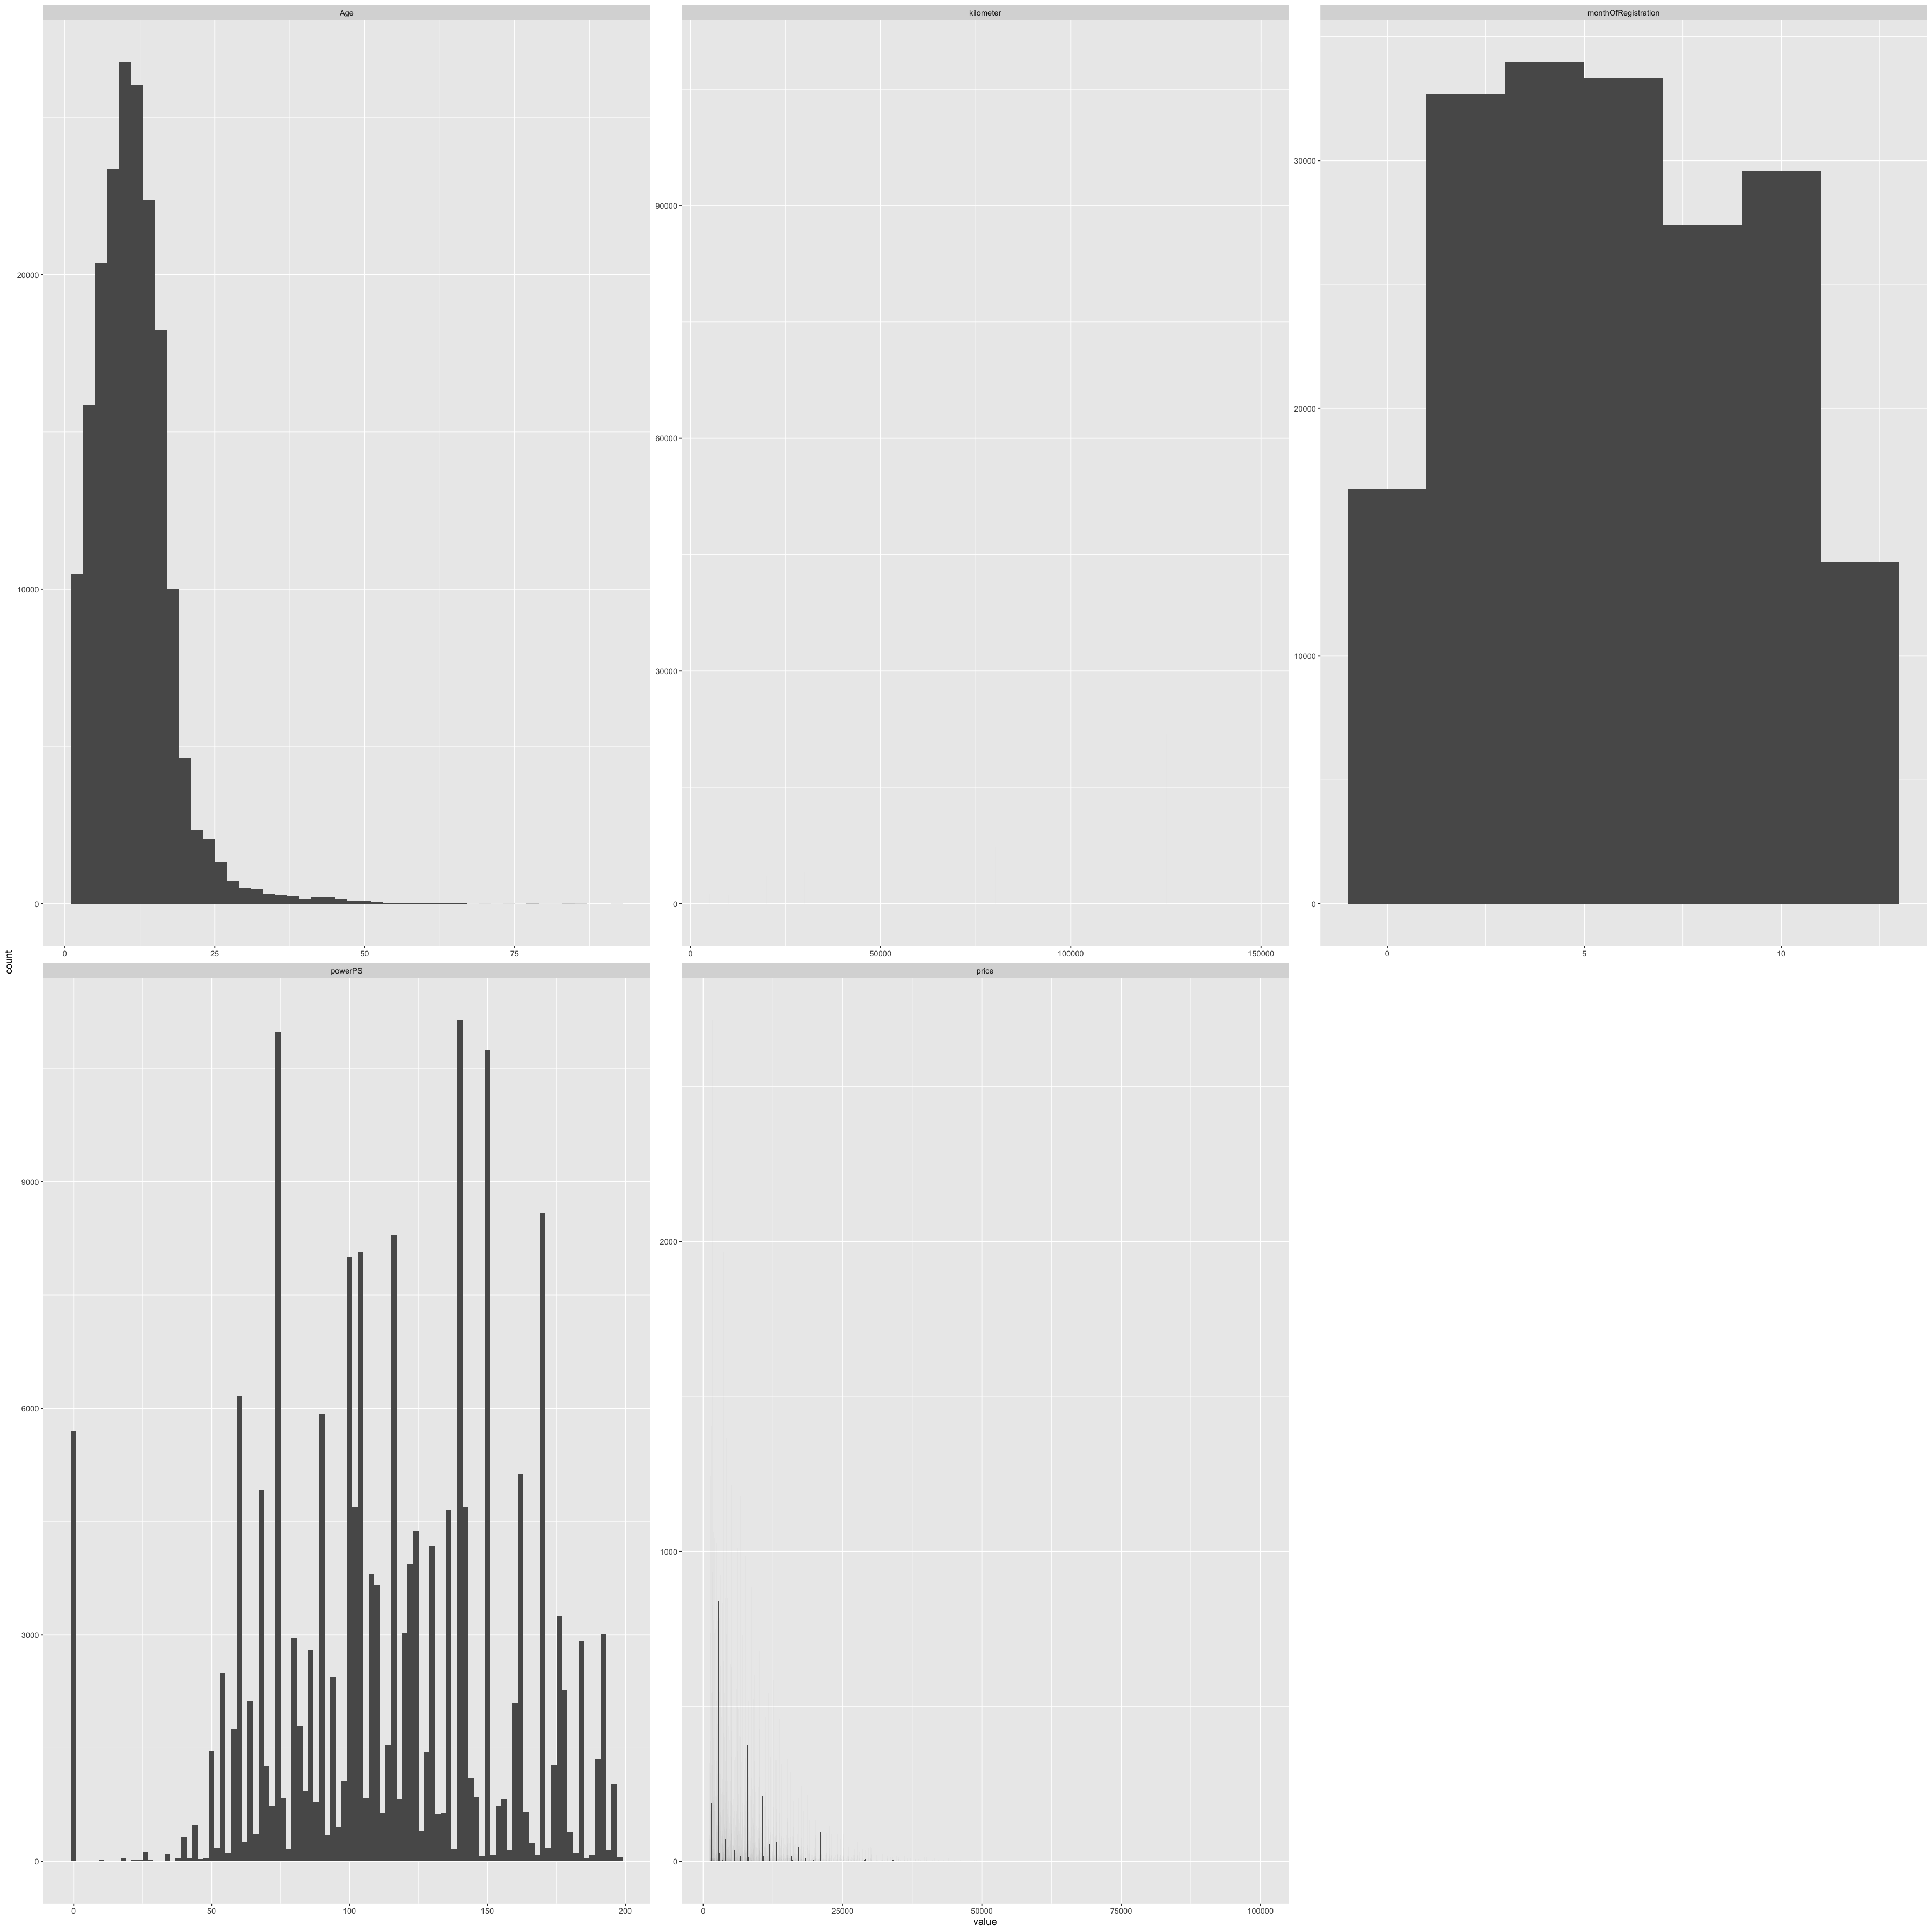

In [127]:
## Visualizing numeric columns with histograms
options(repr.plot.width = 30, repr.plot.height = 30)
car_data_long <- car_data_num %>%                          
  pivot_longer(colnames(car_data_num)) %>% 
  as.data.frame()

ggp1 <- ggplot(car_data_long, aes(x = value)) +    # Draw each column as histogram
  geom_histogram(binwidth = 2) + 
  facet_wrap(~ name, scales = "free")
ggp1

Histograms for powerPS and price are quite unreadable due to the presence of extreme outliers in the data. These outliers are necessary to the dataset however, as they represent extremely expensive and powerful vehicles. The distribution of monthOfRegistration is approximately uniform, while Age appears to be right-skewed and kilometers to be left-skewed. 

In [16]:
## selecting only categorical variables
car_data_cat <- car_data_ready %>% select(-price, -Age, -powerPS, -kilometer, -monthOfRegistration)

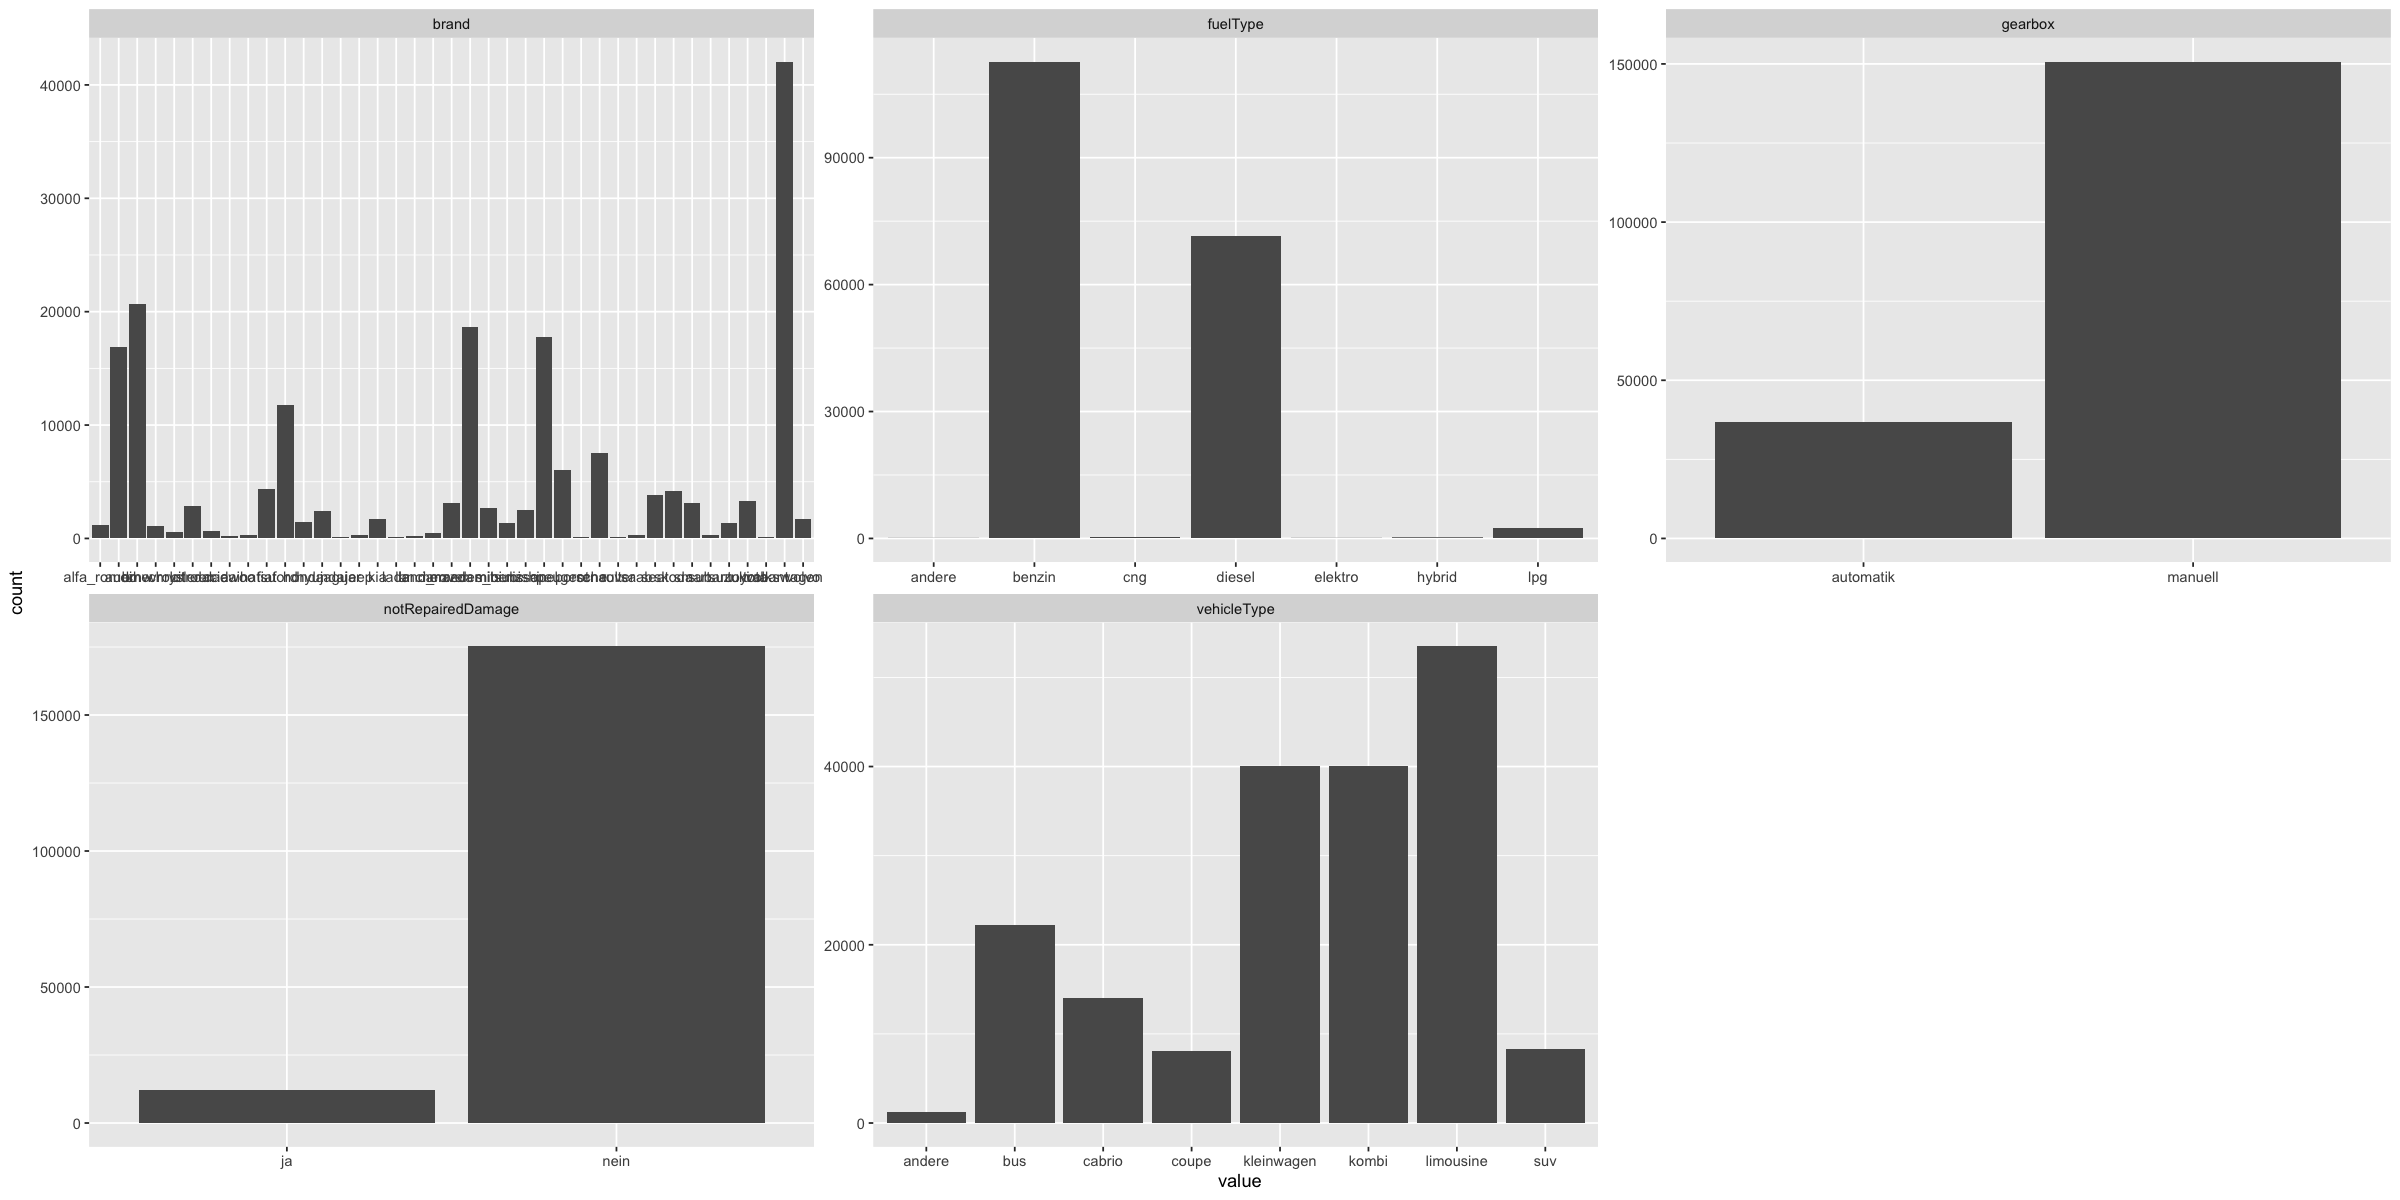

In [17]:
## Visualizing barplots for categorical variables:
options(repr.plot.width = 20, repr.plot.height = 10)
car_data_catlong <- car_data_cat %>%                          
  pivot_longer(colnames(car_data_cat)) %>% 
  as.data.frame()

cat_plot <- ggplot(car_data_catlong, aes(x = value)) +    # Draw each column as histogram
  geom_bar() + 
  facet_wrap(~ name, scales = "free")
cat_plot

From the barplots we can see that the brand variable has a very large amount of possible categories. This will lead to many different "dummy" variables when one-hot encoding is performed. We can also see that most vehicles in the data are manual shifting with no non-repaired damage. 

The correlations appear to have odd shapes, it seems that much of the data was rounded or split into "categories" rather than keeping the exact value. 

In [19]:
# Examining correlation values as a dataframe: 
corr_matrix_cars <- car_data_num %>%
cor() %>%
as.data.frame() %>%
rownames_to_column("variable1") %>%
pivot_longer(-variable1, names_to = "variable2", values_to = "correlation")
corr_matrix_cars

variable1,variable2,correlation
<chr>,<chr>,<dbl>
price,price,1.000000000
price,Age,-0.454980184
price,powerPS,0.360413688
price,kilometer,-0.505141052
price,monthOfRegistration,0.010576102
Age,price,-0.454980184
Age,Age,1.000000000
Age,powerPS,-0.141810798
Age,kilometer,0.391042859


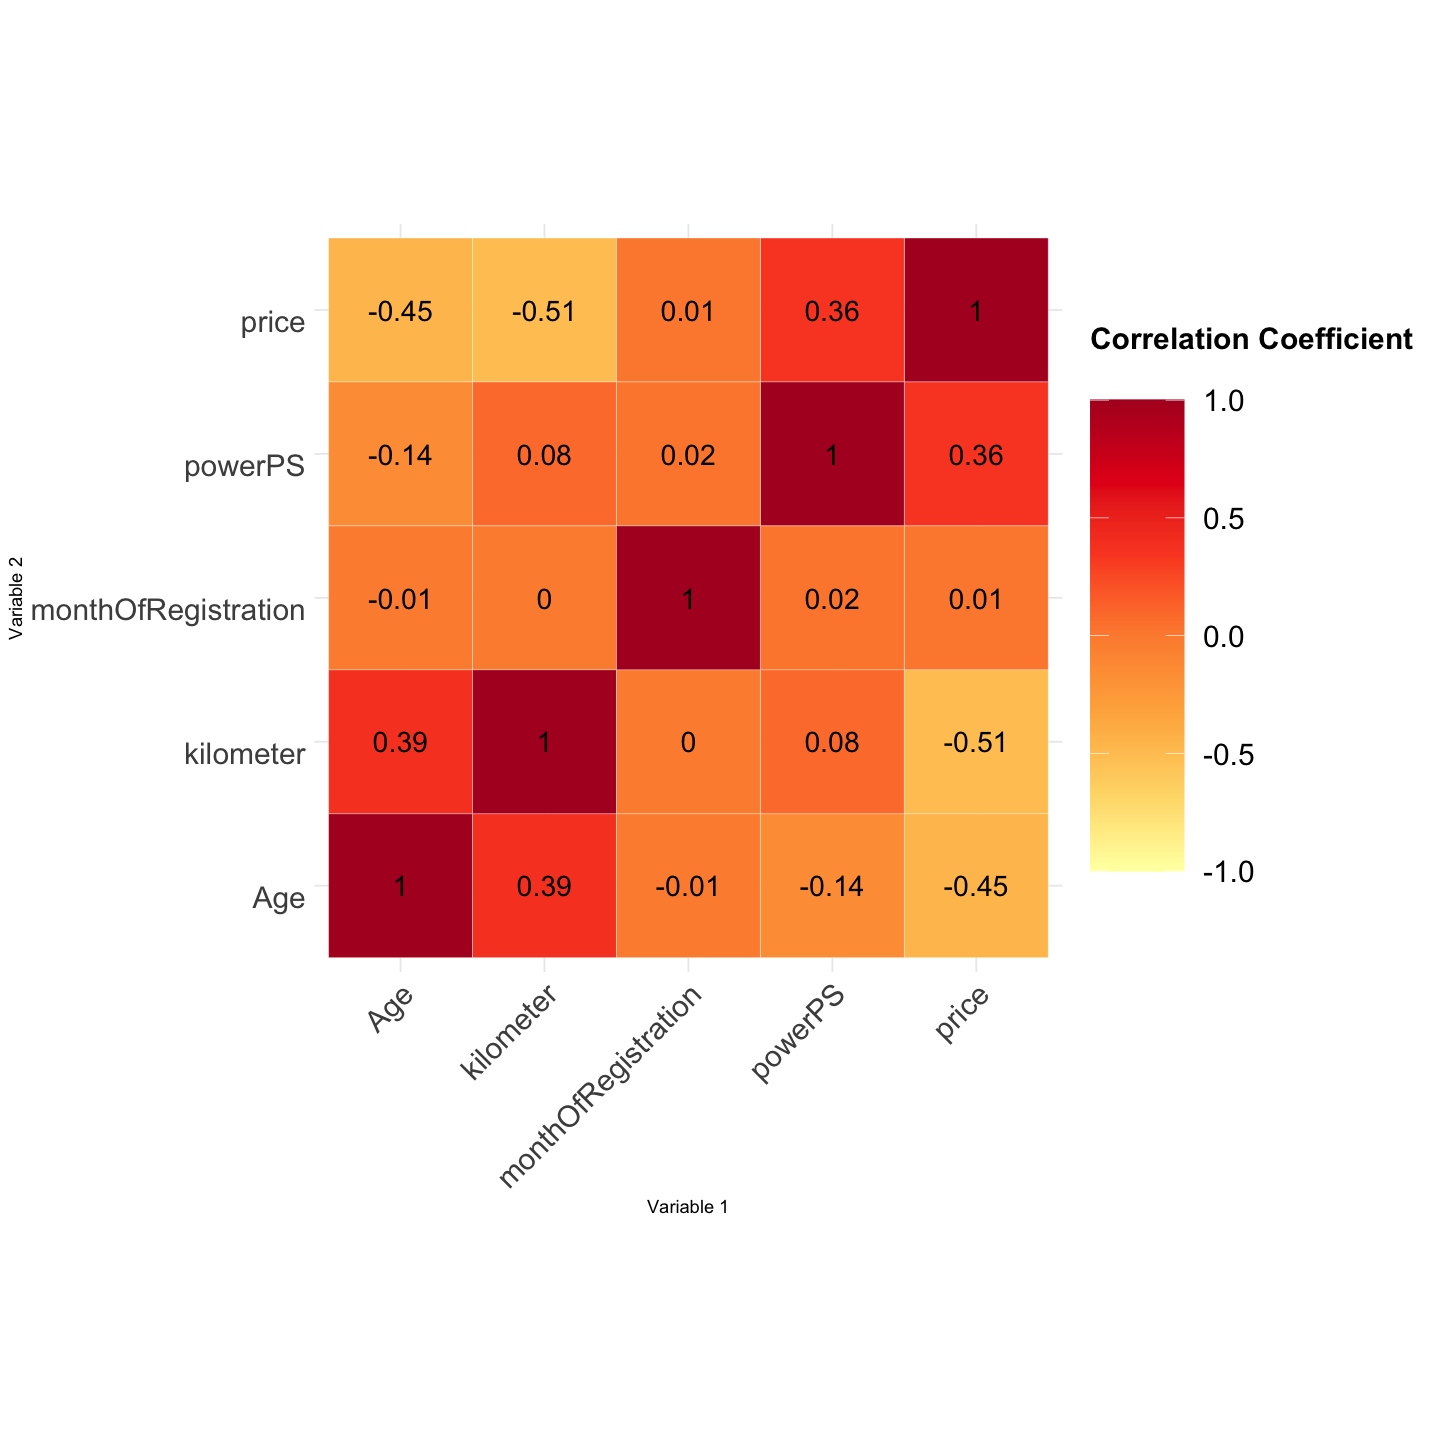

In [20]:
## Examining correlation values through heatmap
options(repr.plot.width = 12, repr.plot.height = 12)
plot_corr_matrix_car <- corr_matrix_cars %>%
  ggplot(aes(variable1, variable2)) +
  geom_tile(aes(fill = correlation), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "YlOrRd",
    direction = 1, limits = c(-1,1)
  ) +
  labs(x = "Variable 1", y = "Variable 2") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(variable1, variable2, label = round(correlation, 2)), color = "black", size = 6)
plot_corr_matrix_car

From the correlation heatmap we see that the numeric variables are all quite minimally correlated. The only correlation greater than 0.1 is the correlation between year of registration and kilometers, which is intuitive as the older a vehicle is, the more it has likely been driven. Therefore it is likely that either the large correlations lie within the categorical variables, or there are generally low correlations between all explanatory variables. 

# End of Exploratory Data Analysis
### All of this code is for further sections of the project, please pay no mind to it. 

In [106]:
## Splitting into training and testing data with 70/30 split
set.seed(124)
car_data_ready$Index <- 1:nrow(car_data_ready)
training_car <- data.frame(sample_n(car_data_ready, size = nrow(car_data_ready) * 0.7, replace = FALSE)) %>% 
filter(vehicleType == "cabrio") %>%
select(-c(vehicleType, brand, fuelType))
testing_car <- data.frame(anti_join(car_data_ready, training_car, by = "Index")) %>% filter(vehicleType == "cabrio") %>%
select(-c(vehicleType, brand, fuelType))
rownames(training_car) <- training_car$Index
rownames(testing_car) <- testing_car$Index
training_car <- training_car %>% select(-Index)
testing_car <- testing_car %>% select(-Index)
head(training_car)
head(testing_car)

,price,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,Age
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
147348,6099.267,automatik,71,40000,7,nein,7
10811,13899.650,manuell,174,90000,8,nein,7
136358,5599.557,manuell,125,40000,4,nein,9
153739,2002.198,automatik,90,150000,2,nein,23
180771,11501.345,manuell,34,60000,9,nein,49
168515,13598.801,manuell,105,80000,9,nein,6


,price,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,Age
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
22,3100.494,automatik,61,80000,1,nein,10
57,4902.071,manuell,116,150000,6,nein,20
87,6999.576,manuell,163,100000,1,nein,10
96,2322.595,manuell,98,150000,3,nein,25
140,8200.409,automatik,170,150000,9,nein,12
257,2393.409,automatik,54,100000,5,nein,16


In this case we have filtered vehicle type to be cabrio (two door convertibles) along with removing the non-binary categorical variables from the dataset for simplicity of the model. Without these specifications the model is very inaccurate and violates the assumption of normally distributed residuals, as we have spent a long time attempting to find the right specifications of the data. We also remove index from the dataframe and designate it as a row index. 

In [107]:
## Performing forward selection to determine the input variables that provide the best model. 
forward_sel <- regsubsets(x = price ~., nvmax = 58, data = training_car, method = "forward")
forward_summary <- summary(forward_sel)
forward_summary

Subset selection object
Call: regsubsets.formula(x = price ~ ., nvmax = 58, data = training_car, 
    method = "forward")
6 Variables  (and intercept)
                      Forced in Forced out
gearboxmanuell            FALSE      FALSE
powerPS                   FALSE      FALSE
kilometer                 FALSE      FALSE
monthOfRegistration       FALSE      FALSE
notRepairedDamagenein     FALSE      FALSE
Age                       FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: forward
         gearboxmanuell powerPS kilometer monthOfRegistration
1  ( 1 ) " "            " "     "*"       " "                
2  ( 1 ) " "            "*"     "*"       " "                
3  ( 1 ) "*"            "*"     "*"       " "                
4  ( 1 ) "*"            "*"     "*"       " "                
5  ( 1 ) "*"            "*"     "*"       " "                
6  ( 1 ) "*"            "*"     "*"       "*"                
         notRepairedDamagenein Age
1  ( 1 ) " "       

In [108]:
## Examining the statistics of each model to choose the best model, as we plan to predict we will choose the model with the
## lowest Cp
forward_summary_df <- tibble(
    n_input_variables = 1:6,
    RSQ = forward_summary$rsq,
    RSS = forward_summary$rss,
    ADJ.R2 = forward_summary$adjr2,
    Cp = forward_summary$cp,
    BIC = forward_summary$bic,
) %>% arrange(Cp)

head(forward_summary_df)

n_input_variables,RSQ,RSS,ADJ.R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,0.3979607,273237939167,0.3975907,7.000000,-4892.294
5,0.3977296,273342819150,0.3974212,8.746674,-4897.732
4,0.3937657,275141886557,0.3935173,71.015556,-4842.839
3,0.3884800,277540803123,0.3882921,154.713116,-4767.230
2,0.3810080,280931989547,0.3808813,273.857972,-4657.788
1,0.2846668,324656860049,0.2845935,1833.860900,-3253.973


It appears that the model with all 6 input variables will produce the most accurate predictions. We will now obtain the variables that are present in this model using forward_summary. 

Variables to use: gearbox, powerPS, kilometer, monthOfRegistration, notRepairedDamage and Age

In [109]:
## Creating linear model with selected variables and initial results 
lm_model_base <- lm(price ~ gearbox + powerPS + kilometer + notRepairedDamage + Age, data = training_car)
tidy(lm_model, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.622647e+00,3.686788e-02,233.879690,0.000000e+00,8.550379e+00,8.694916e+00
gearboxmanuell,-1.449550e-01,1.371132e-02,-10.571921,5.555862e-26,-1.718320e-01,-1.180780e-01
powerPS,6.587953e-03,1.343135e-04,49.049061,0.000000e+00,6.324670e-03,6.851235e-03
kilometer,-9.406761e-06,1.392356e-07,-67.560047,0.000000e+00,-9.679691e-06,-9.133830e-06
notRepairedDamagenein,5.366678e-01,2.701803e-02,19.863320,4.185252e-86,4.837068e-01,5.896287e-01
Age,-5.461560e-03,7.917412e-04,-6.898164,5.594820e-12,-7.013537e-03,-3.909584e-03


In [110]:
train_preds <- predict(lm_model_base, training_car)
length(train_preds[train_preds < 0])

[1] 175

Above we notice that there are many negative predictions with this model. Since price is a positive variable, we will counter this by taking the log of price in the model to ensure all predictions are positive. 

In [111]:
## Creating model with log(price) as response
lm_model <- lm(log(price) ~ gearbox + powerPS + kilometer + notRepairedDamage + Age, data = training_car)
tidy(lm_model, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.622647e+00,3.686788e-02,233.879690,0.000000e+00,8.550379e+00,8.694916e+00
gearboxmanuell,-1.449550e-01,1.371132e-02,-10.571921,5.555862e-26,-1.718320e-01,-1.180780e-01
powerPS,6.587953e-03,1.343135e-04,49.049061,0.000000e+00,6.324670e-03,6.851235e-03
kilometer,-9.406761e-06,1.392356e-07,-67.560047,0.000000e+00,-9.679691e-06,-9.133830e-06
notRepairedDamagenein,5.366678e-01,2.701803e-02,19.863320,4.185252e-86,4.837068e-01,5.896287e-01
Age,-5.461560e-03,7.917412e-04,-6.898164,5.594820e-12,-7.013537e-03,-3.909584e-03


From the p-values given in the tidy table we can see that all of the explanatory variables are significant and should be included in the model. 


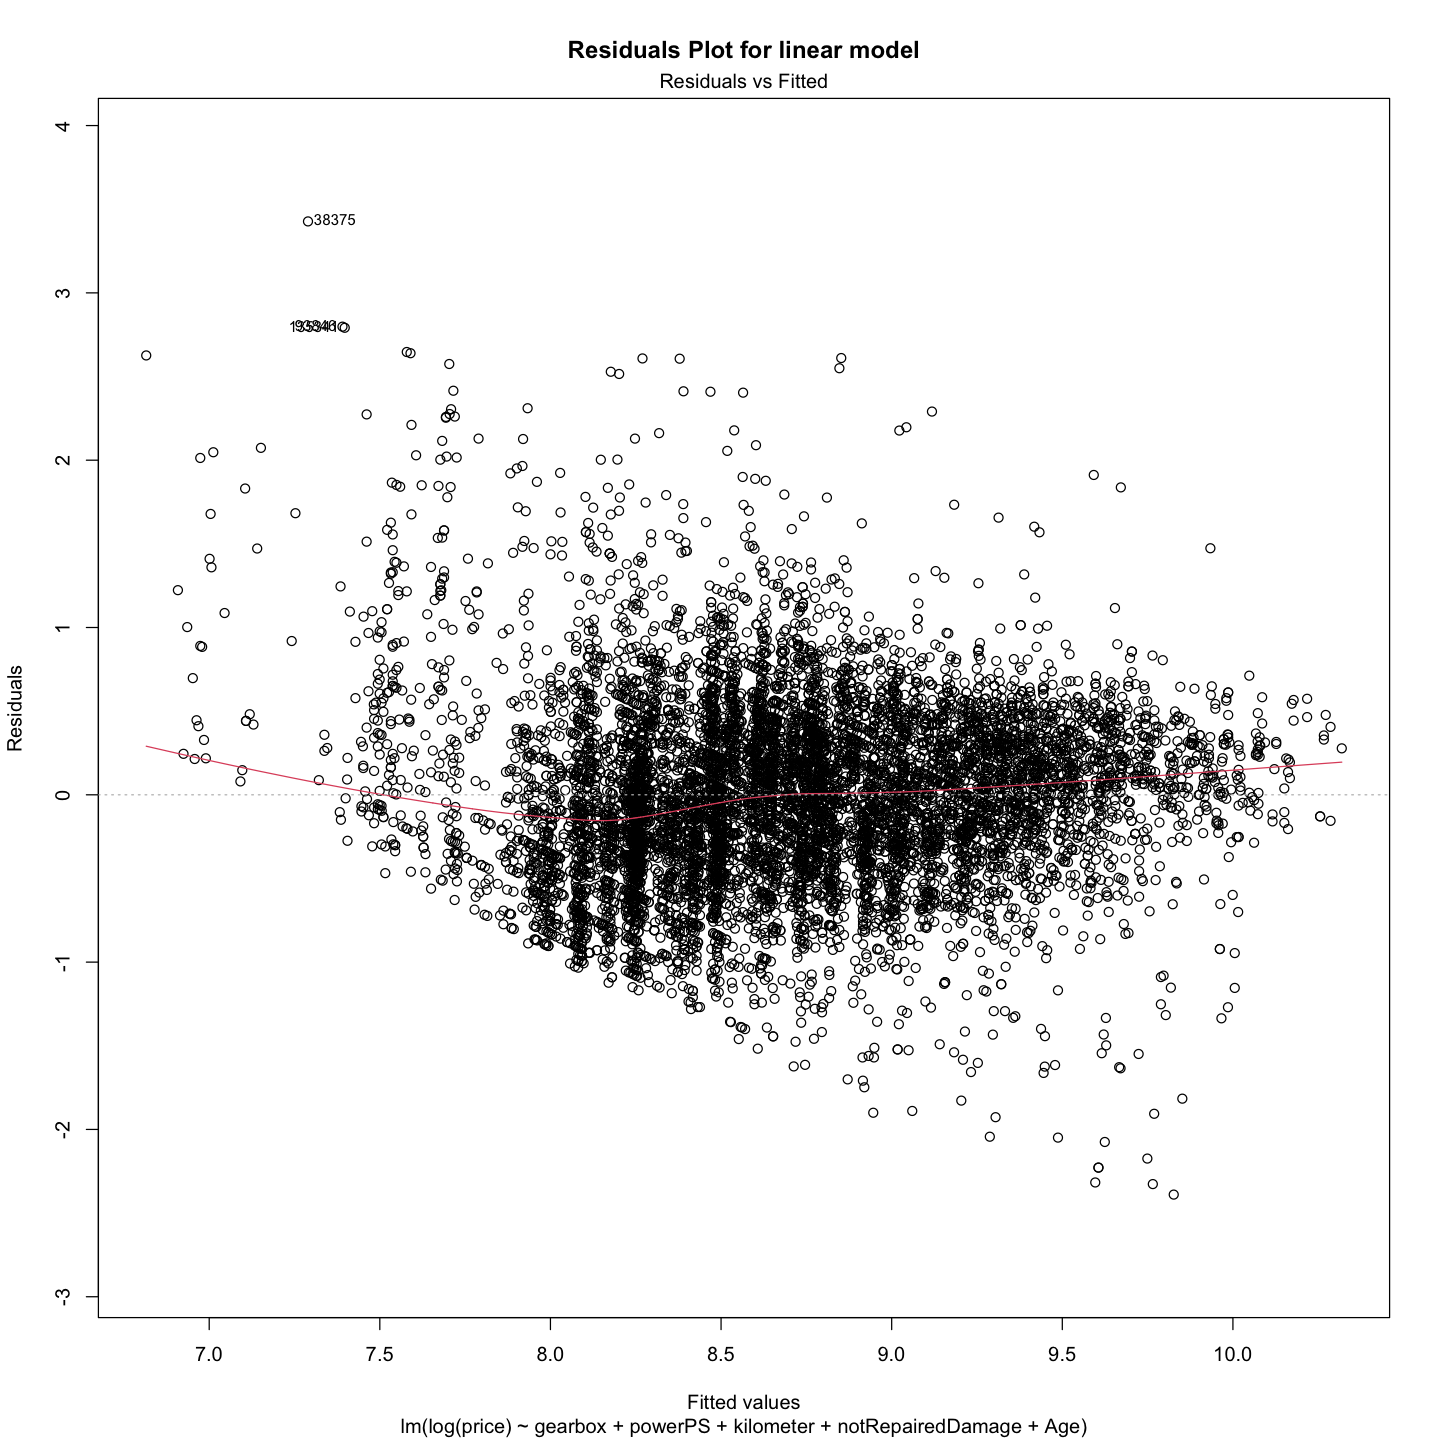

In [112]:
## Examining model for heteroscedacisity by looking at residual plots
plot(lm_model, 1, main = "Residuals Plot for linear model")


The residuals seem to be approximately randomly distributed about zero, with the points with lower fitted values being slightly under-predicted. This plot also implies homoscedasticity within our filtered dataset. 

Once again there are outliers in the data, even with the most extreme outliers removed. These outliers will remain in the data as the model needs to take into account some of the extreme cases of the data. It does appear that the residuals are approximately evenly spread in terms of variance, indicating the presence of homoscedasticity. 

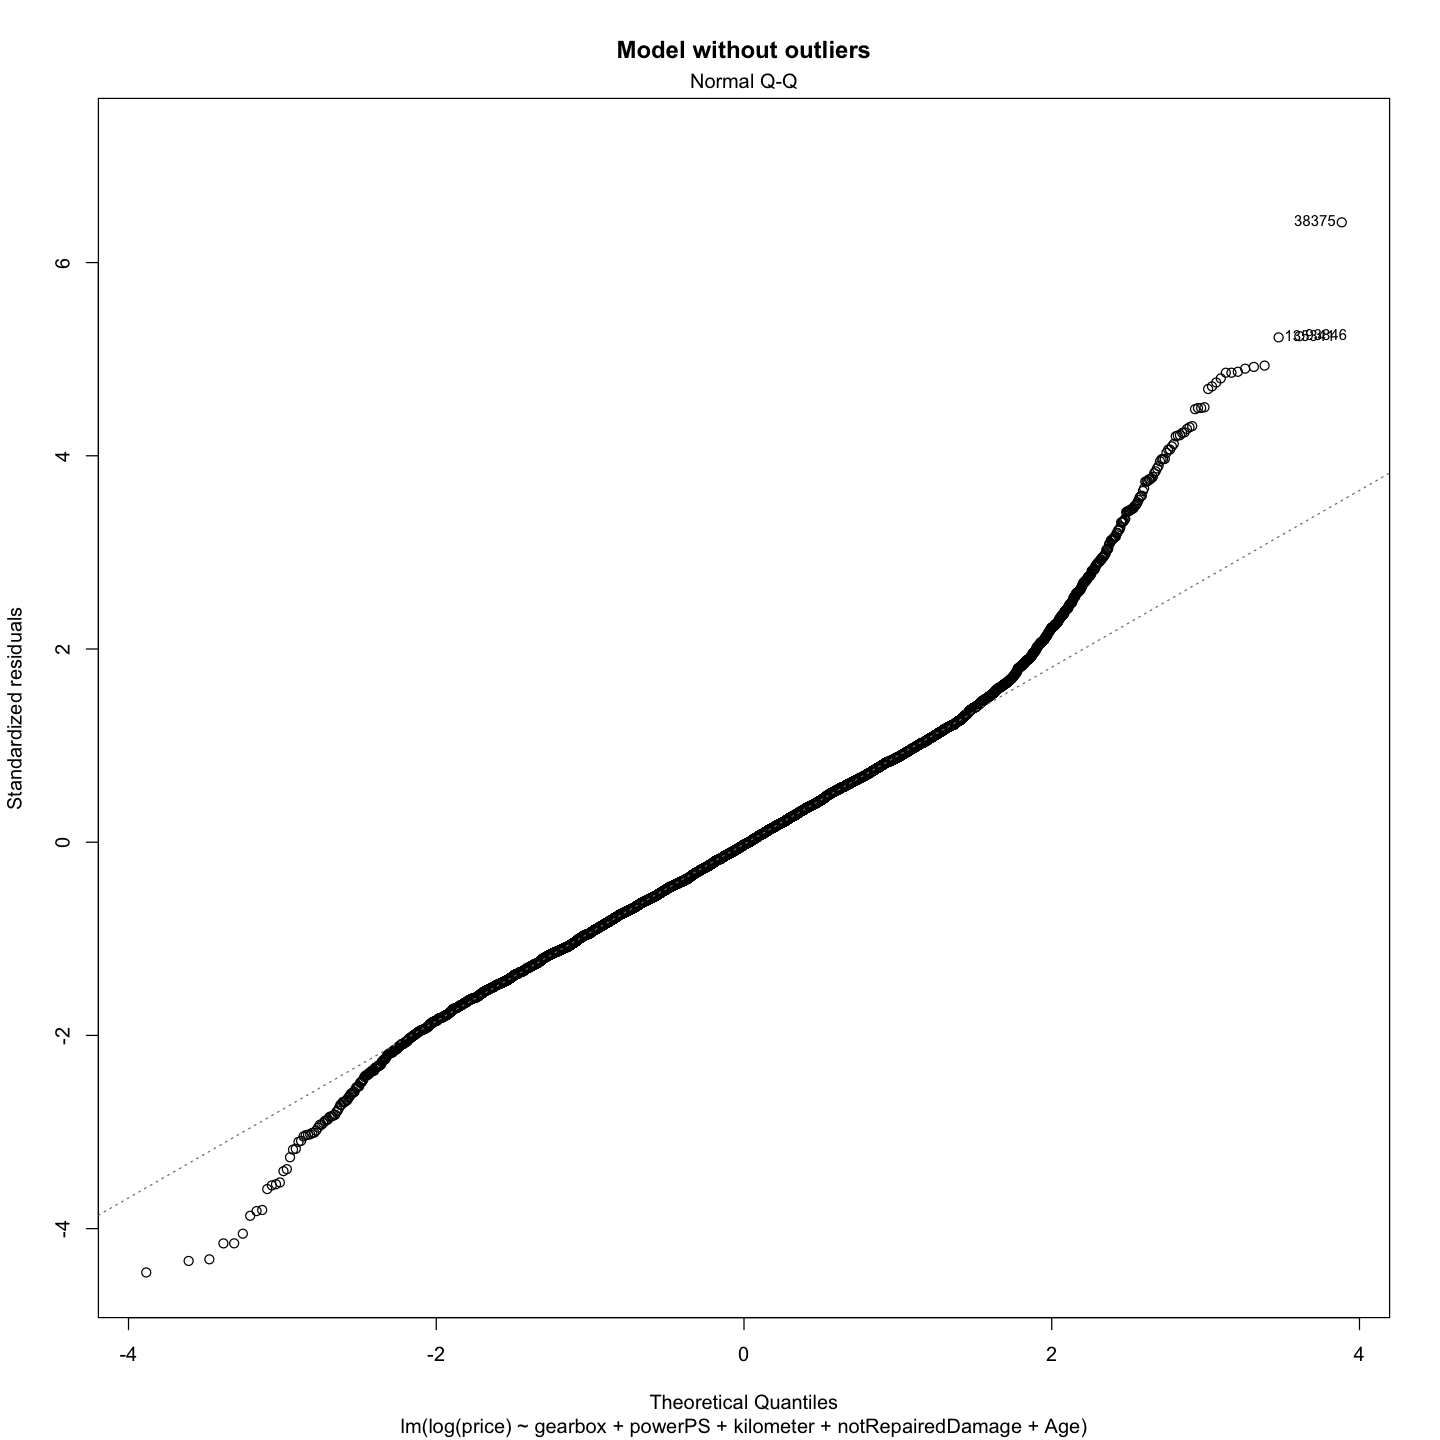

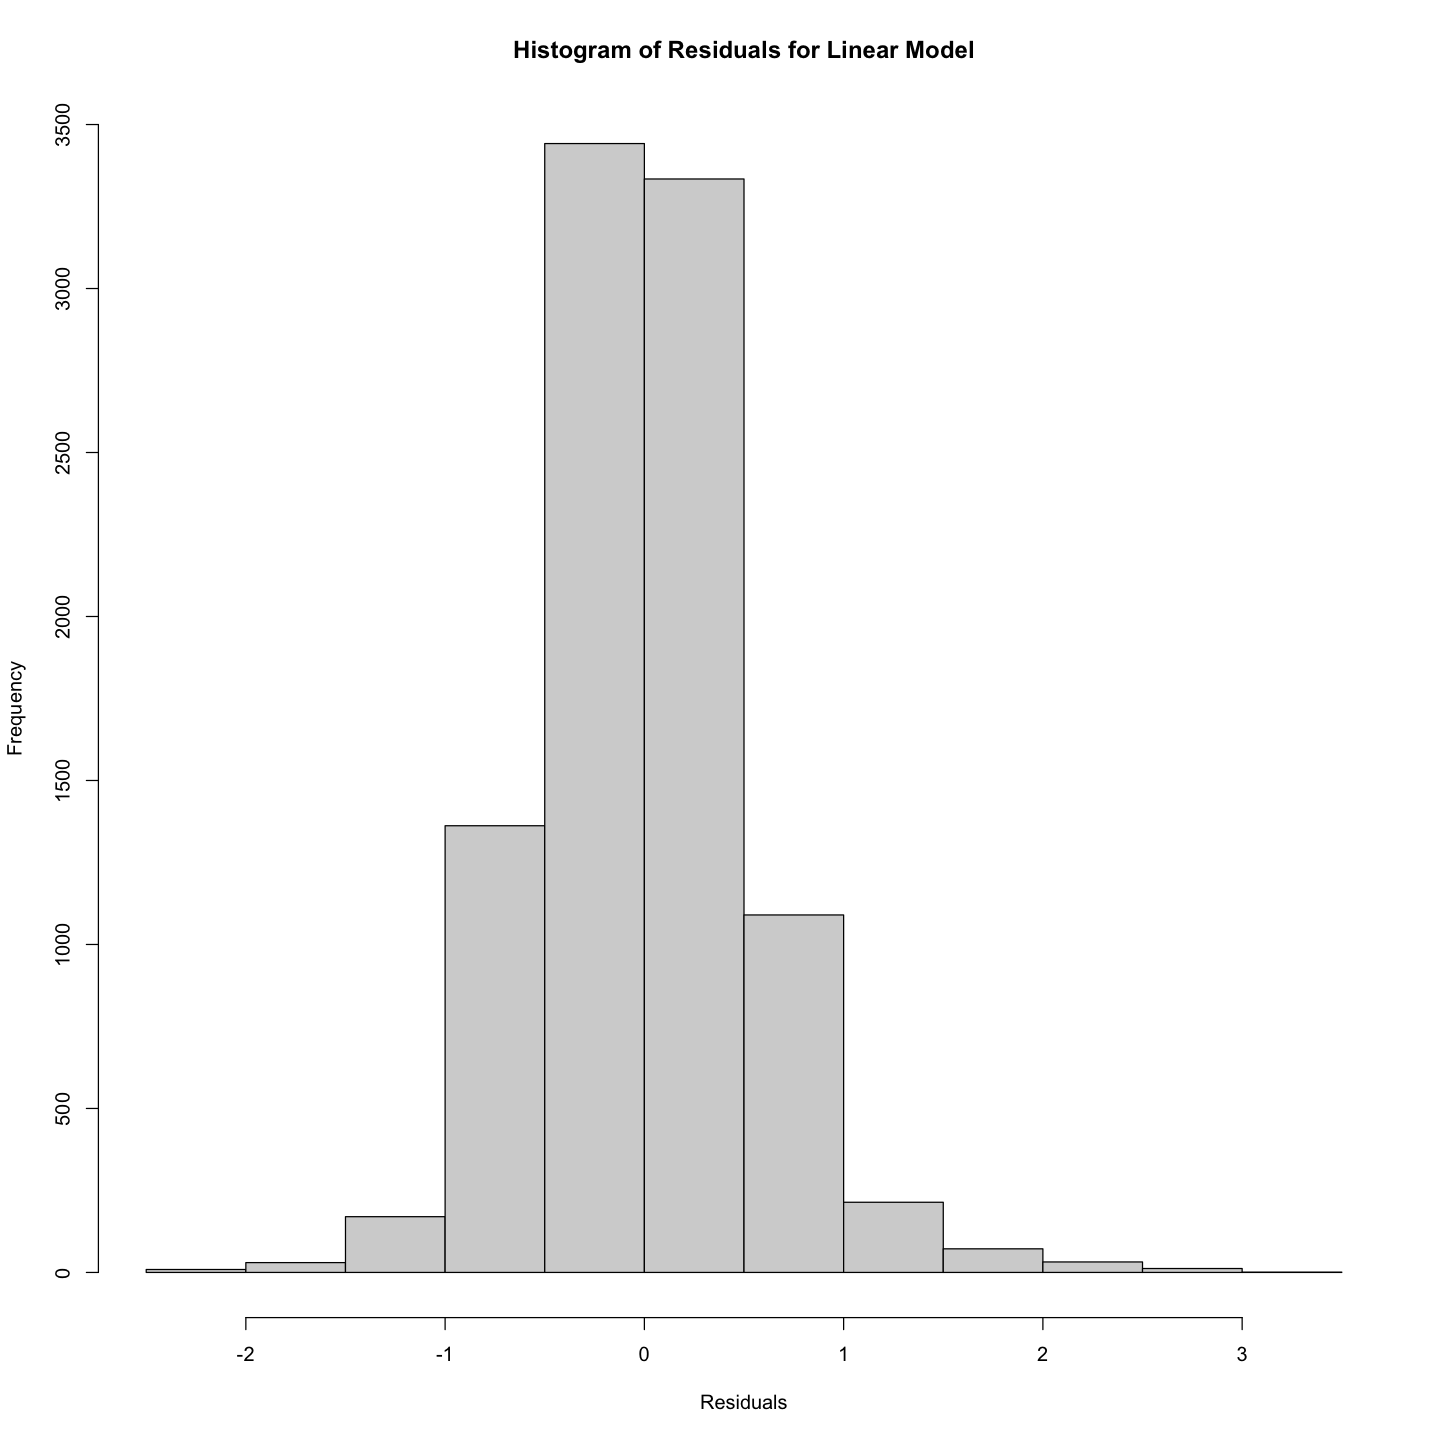

In [114]:
## Analyzing QQ plot and histogram of resiudals to ensure normality assumption is valid. 
plot(lm_model, 2, main = "Model without outliers")
hist(residuals(object = lm_model),
  breaks = 10,
  main = "Histogram of Residuals for Linear Model",
  xlab = "Residuals"
)

From the above plots we can see that the residuals are not exactly normally distributed. However this appears to be due to the presence of outliers in the data that have very large residual values, as the "middle" section of the qq-plot is a straight line along the 45 degree line, illustrating normality. It is just at the tails of the qq-plot where normality may not necessarily be present. The histogram of residuals appears to be approximately normal, with slightly longer tails. This once again references the outliers in the data. 

In [124]:
## Predicting on the data with 95% confidence intervals for each prediction
preds <- predict(lm_model, testing_car, interval = "prediction", level = 0.95)
testing_with_preds <- cbind(testing_car, preds) %>% mutate(logprice = log(price)) %>% mutate(efit = exp(fit))
head(testing_with_preds)


,price,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,Age,fit,lwr,upr,logprice,efit
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,3100.494,automatik,61,80000,1,nein,10,8.754024,7.701092,9.806955,8.039317,6336.131
57,4902.071,manuell,116,150000,6,nein,20,8.258317,7.205698,9.310937,8.497413,3859.594
87,6999.576,manuell,163,100000,1,nein,10,9.092905,8.040285,10.145525,8.853605,8891.977
96,2322.595,manuell,98,150000,3,nein,25,8.112426,7.059730,9.165123,7.750440,3335.661
140,8200.409,automatik,170,150000,9,nein,12,8.802714,7.749830,9.855598,9.011939,6652.275
257,2393.409,automatik,54,100000,5,nein,16,8.487003,7.434063,9.539943,7.780474,4851.307


From the first 6 points in our dataset we can see that the predictions are not very accurate for the model, however the prediction intervals are quite wide and do contain the predicted values. This will be explored further through metrics such as R^2 score. 

In [121]:
## Calculating mean squared prediction error (MSPE): 
MSPE <- mean((log(testing_car$price) - predict(lm_model, testing_car))^2)
MSPE

[1] 0.2685483

From the MSPE we can see that each prediction has an average squared error of 0.268. However since we are working in terms of log(price), this is not a very interpretable value, as this represents that the MSPE is 0.268 log($)^2. To produce an interpretable metric we will produce the RMSE of the original price and exp of the predictions.


In [126]:
MSPE_scaled <- sqrt(mean((testing_car$price - exp(predict(lm_model, testing_car)))^2))
MSPE_scaled

[1] 4967.619

This metric reveals that the average prediction is off by ~$5000, which is not very good. However this is the best results we can obtain from this dataset, as there are many outliers or data points entered incorrectly that skew the predictions. 

Potential Improvements: 
- Remove inaccurate/outlier data
- Find a productive way to include categorial variables (ie. vehicle type and brand) into model using one-hot encoding. 
- Scaling of numeric variables where necessary. 

## References:

1. A Quantitative Analysis of the Used-Car Market
Gavazza, Alessandro; Lizzeri, Alessandro; Roketskiy, Nikita
The American Economic Review; Nashville Vol. 104, Iss. 11,  (Nov 2014): 3668-3700. DOI:10.1257/aer.104.11.3668
https://www.proquest.com/docview/1616544603?accountid=14656&pq-origsite=summon

2. Car Price Prediction using Machine Learning Techniques
Enis Gegic, Becir Isakovic, Dino Keco, Zerina Masetic, Jasmin Kevric
DOI: https://doi.org/10.18421/TEM81-16
https://doaj.org/article/b2eabc7cfbae4de284f0ac631260ca52

3. https://data.world/data-society/used-cars-data